In [1]:
# The goal in this slightly modified version of an LQR based controller
# for the double integrator like system is to be able to drive the
# error in the state to 0 instead of the state itself!
%matplotlib notebook
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import cvxpy
import math

In [2]:
class lqr:
    
    def __init__(self, A, B, state_dim, initial_state, goal_state, horizon, Q, R):
        self.initial = initial_state
        self.goal = goal_state
        self.A = A             # State matrix
        self.B = B
        self.n = state_dim
        self.N = horizon
        self.Q = Q
        self.R = R
        
    
    def plot_trajectory(self, trajectory):
        plt.figure(figsize=(8,8))
        
        plt.scatter(self.initial[0], self.initial[1], s=120, color='r', marker='o', edgecolors='k', clip_on=False, zorder=2)
        plt.text(self.initial[0], self.initial[1], 'initial')
        
        plt.scatter(self.goal[0], self.goal[1], s=120, color='g', marker='o', edgecolors='k', clip_on=False, zorder=2)
        plt.text(self.goal[0], self.goal[1], 'goal')
        
        plt.plot(trajectory[0,:], trajectory[1,:], 'o-', markersize=3.5)
        plt.grid(True)
        plt.show()
    
    
    def lqr_control(self):
        P = np.zeros((self.n, self.n, self.N))
        P[:,:, self.N-1] = self.Q
        K = np.zeros((self.n, self.N))
        K[:, N-1] = (1/(self.R + self.B.T @ self.Q @ self.B)) * self.B.T @ self.Q @ self.A

        for i in np.arange(self.N-2, 0, -1):
            P[:, :, i] = Q + (self.A.T @ P[:,:,i] @ self.A) - ( (1/( self.B.T @ P[:,:,i] @ self.B + self.R )) * (self.A.T @ P[:,:,i] @ self.B) * (self.B.T @ P[:,:,i] @ self.A) )
            K[:, i] = (1/(self.R + self.B.T @ P[:,:,i] @ self.B)) * (self.B.T @ P[:,:,i] @ self.A)
        
        x = np.zeros((self.n, self.N))
        x[:,0] = self.initial
        self.B = self.B.reshape(2,1)
        
        # Propagating the state using closed loop control
        for i in range(self.N-1):
            Kgain = K[:,i].reshape(1,2)
            x[:, i+1] = np.matmul(self.A - np.matmul(self.B, Kgain), x[:,i] - self.goal) + self.goal
        
        self.plot_trajectory(x)

<IPython.core.display.Javascript object>


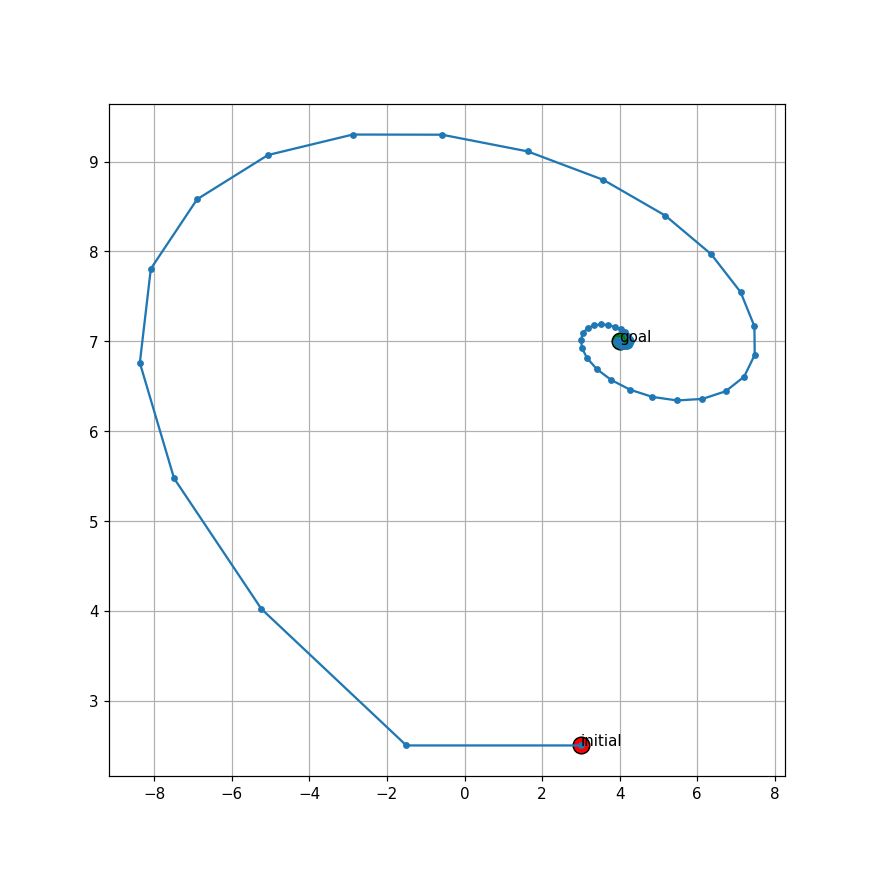

In [3]:
A = np.array([[1,1],[0,1]])
B = np.array( [[0.5],
               [1]] ).reshape(2,)
N = 120
n = 2
Q = np.array([[1, 0], [0, 1]])
R = 5
init = np.array([[3],[2.5]]).reshape(2,)

# we want to drive the system using our LQR controller to this goal state
goal = np.array([[4],[7]]).reshape(2,)    

l = lqr(A=A, B=B, state_dim=2, initial_state=init, goal_state = goal, horizon=N, Q=Q, R=R)
l.lqr_control()